# 機械学習をPythonで実践する

In [247]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from cost_func import cost_func
from grad_descent import grad_descent

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ 最急降下法をスクラッチで実装する
リソース：~/python-work/TIL/Python/sample_data/ML_sample/sample_data.csv

In [2]:
# サンプルデータ（賃貸の広さと家賃の関係データ）を読み込む
df = pd.read_csv('../Python/sample_data/ML_sample/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


<AxesSubplot:xlabel='space', ylabel='rent'>

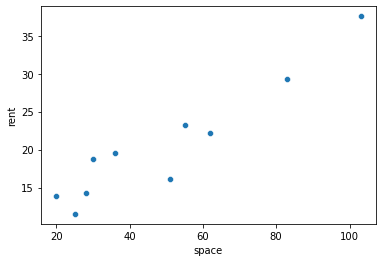

In [11]:
# データを可視化
sns.scatterplot(x=df['space'], y=df['rent'])

### - 損失関数を定義

In [82]:
# 損失関数cost_funcを呼び出し
# thetaは線形回帰モデルのパラメタの初期値
theta = np.array([[2.0] , [1.0]])
# .valuesでnumpy arrayで値を取得
target_var = df['rent'].values
features = df['space'].values
cost_func(theta, target_var=target_var, features=features)

array([1296.33604159])

### - 損失関数を可視化する
講義のやり方では2パラメタ（と1つの特徴量）のみの対応だが、任意のパラメタ数に  
対応できるように関数の拡張を目指す。

In [152]:
# 3Dプロット用のデータを用意する。
# x,y軸はtheta_0,theta_1
# z軸は損失関数の戻り値（MSE）

# サンプルデータより、theta_0の範囲（切片）は-20～20、theta_1（傾き）の範囲は -1 ～ 1と設定。
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0,max_0,n0)
theta_1 = np.linspace(min_1,max_1,n1)
theta_mesh = np.meshgrid(theta_0,theta_1)
theta_mesh

[array([[-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        ...,
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.99331104, -0.99331104, -0.99331104, ..., -0.99331104,
         -0.99331104, -0.99331104],
        [-0.98662207, -0.98662207, -0.98662207, ..., -0.98662207,
         -0.98662207, -0.98662207],
        ...,
        [ 0.986622

In [153]:
# 10/8 thetaをリストで渡せるようにcost_funcを修正した。
theta = [theta_0, theta_1]
target_var = df['rent'].values
features = df['space'].values
mse = cost_func(theta, target_var=target_var, features=features)

In [114]:
mse = mse.reshape(len(theta_0), len(theta_1))
mse

array([[9180.43815951, 9109.88103261, 9039.60106593, ...,  407.8256952 ,
         419.58515089,  431.6217668 ],
       [9156.38986166, 9085.92096644, 9015.72923143, ...,  409.9822049 ,
         421.82989227,  433.95473985],
       [9132.37735759, 9061.99669405, 8991.89319072, ...,  412.17450839,
         424.11042743,  436.32350669],
       ...,
       [3611.44522664, 3567.0929073 , 3523.01774817, ..., 2621.66060542,
        2659.62486867, 2697.86629212],
       [3598.02768236, 3553.7635947 , 3509.77666724, ..., 2634.44786869,
        2672.50036362, 2710.83001875],
       [3584.64593187, 3540.47007588, 3496.5713801 , ..., 2647.27092575,
        2685.41165235, 2723.82953916]])

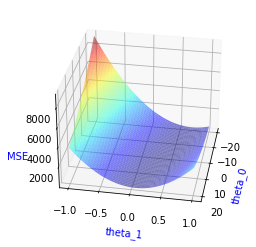

In [116]:
# グラフの描画
# theta_mesh[0],theta_mesh[1]の配列がそのままではMSEの値と対応していないので、転置している。(これはmeshgridとproductの結果で判断)
ax = plt.axes(projection='3d')
ax.plot_surface(X=theta_mesh[0].T, Y=theta_mesh[1].T, Z=mse, cmap='jet', alpha=0.5)
ax.set_xlabel("theta_0", size = 10, color = "b")
ax.set_ylabel("theta_1", size = 10, color = "b")
ax.set_zlabel("MSE", size = 10, color = "b")
# 見る角度を変える
ax.view_init(elev=30, azim=10)

In [108]:
# パラメタ3つ、特徴量2つの場合のテスト。特徴量はいいのがなかったので'rent'を使っている。
theta_0 = np.linspace(-2,2,10)
theta_1 = np.linspace(3,6,10)
theta_2 = np.linspace(9,2,10)
theta = [theta_0, theta_1, theta_2]
target_var = df['rent'].values
features = df[['space','rent']].values
mse = cost_func(theta, target_var=target_var, features=features)
mse.shape

(1000,)

### - 最急降下法のアルゴリズム実装
学習率は$\alpha=0.00005$、反復回数は10万回とする。

In [342]:
# 学習率、反復回数(epochs)を設定。機械学習では反復１回１回をエポックと呼ぶことが多い。
alpha = 0.00005
epochs = 100000
# パラメタの初期値を設定。
# 本来の最急降下法ではパラメタの初期値はランダムに決める
# theta_0_init = np.random.uniform(min_0,max_0)
theta_0 = -5
theta_1 = -0.5
theta_init = np.array([theta_0, theta_1])

In [343]:
# 最急降下法の関数テスト
features = df['space'].values
target_var = df['rent'].values
p, l = grad_descent(theta_init, target_var, features, alpha, epochs)

In [344]:
p

(5.692313583745944, 0.2972194648547114)